#Predicting burnout in employees

Description of variables (from 2021_03_08_Data_processing.pdf, provided with the data) 

Verhoef, N. C., de Ruiter, M., Blomme, R. J., & Curfs, E. C. (2021, May 25). Burnout among Dutch general practitioners. Mendeley Data. https://data.mendeley.com/datasets/xz9wwsfbxk/2


#1) First look at data and imputation of missing variables




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.3 MB/s 


In [ ]:
import pyreadstat

In [ ]:
df, meta = pyreadstat.read_sav('masterT1Causes - kopie.sav')  


In [ ]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      900 non-null    float64
 1   q0001   178 non-null    float64
 2   q0002   178 non-null    float64
 3   q0003   178 non-null    float64
 4   q0004   178 non-null    float64
 5   q0005   178 non-null    float64
 6   q0006   178 non-null    float64
 7   q0007   177 non-null    float64
 8   q0008   177 non-null    float64
 9   q0009   177 non-null    float64
 10  q0010   177 non-null    float64
 11  q0011   177 non-null    float64
 12  q0012   177 non-null    float64
 13  q0013   177 non-null    float64
 14  q0014   176 non-null    float64
 15  q0015   176 non-null    float64
 16  q0016   176 non-null    float64
 17  q0017   175 non-null    float64
 18  q0018   175 non-null    float64
 19  q0019   175 non-null    float64
 20  q0020   175 non-null    float64
 21  q0021   175 non-null    float64
 22  q

In [ ]:
suplist = []      
for x in range(178,900):   
  suplist.append(int(x))

In [ ]:
df = df.drop(suplist, inplace = False)   #deleting rows with all missing values 

In [ ]:
from sklearn.impute import KNNImputer     #impute missing values to rows 0-177

In [ ]:
imputer = KNNImputer()
imputer.fit(df)

KNNImputer()

In [ ]:
dataset = imputer.transform(df)

In [ ]:
names = imputer.feature_names_in_
dataset = pd.DataFrame(dataset, columns = names, index = df.index)

# 2) Quantitative analysis and selection of variables

## 2.1) Method 1: examining correlations between variables since there are many 

<function matplotlib.pyplot.show>

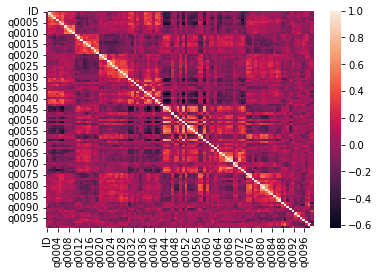

In [ ]:
correlations = dataset.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show

In [ ]:
pd.set_option('display.max_rows', 500)      #to see all the rows and columns of the dataset
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
corrlist = dataset.corr().unstack().sort_values().drop_duplicates()
print(corrlist)

q0051  q0041   -0.625252
q0045  q0038   -0.616740
q0038  q0051   -0.606477
q0041  q0045   -0.605775
q0044  q0038   -0.603817
                  ...   
       q0045    0.781866
q0069  q0068    0.788863
q0051  q0059    0.802260
       q0044    0.807854
ID     ID       1.000000
Length: 4951, dtype: float64


In [ ]:
corrlist[4941:4951]  #positive correlations above 0.7, need to be aware of potential multicollinearity problems

q0021  q0020    0.715783
q0067  q0069    0.735485
q0051  q0045    0.736253
q0059  q0044    0.751508
q0081  q0080    0.753974
q0044  q0045    0.781866
q0069  q0068    0.788863
q0051  q0059    0.802260
       q0044    0.807854
ID     ID       1.000000
dtype: float64

Since many of the high correlations are for questions in the same categories, one solution could be grouping those variables together

e.g. work pace and quantity = (q0001-q0006)




## 2.2) Method 2: examining correlations between q0051 (depent variable) and others

**Values between 0 and 0.3** (0 and −0.3) indicate a **weak positive **(negative) linear relationship through a shaky linear rule.


**Values between 0.3 and 0.7** (0.3 and −0.7) indicate a **moderate positive** (negative) linear relationship through a fuzzy-firm linear rule.


**Values between 0.7 and 1.0**  (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.

*Bruce Ratner Journal of Targeting, Measurement and Analysis for Marketing volume 17, pages139–142 (2009)*

In [ ]:
realgs = correlations['q0051'].where(correlations['q0051'].abs() >= 0.3)

In [ ]:
print(realgs.dropna())

q0001   -0.348510
q0002   -0.368290
q0003   -0.433520
q0005   -0.432362
q0006   -0.600572
q0031   -0.469782
q0032   -0.389581
q0037   -0.338742
q0038   -0.606477
q0039   -0.322980
q0041   -0.625252
q0042   -0.476409
q0044    0.807854
q0045    0.736253
q0046    0.590217
q0049    0.509776
q0051    1.000000
q0053    0.513781
q0054    0.597592
q0055    0.686898
q0056    0.500008
q0059    0.802260
q0062    0.318018
q0064    0.307891
q0068    0.342842
q0072    0.329393
q0073    0.452923
q0074    0.316718
Name: q0051, dtype: float64


## 2.3) Selection of variables 

Quantitative: drop variables that don't show a linear relationship with q0051 (those not included in the list above)

Qualitative: additionally drop questions from the list that don't make sense qualitatively (q0062-q0074). Either question formulation was confusing or not clearly interpretable for our analysis

Final dataset can be found in the section below


#3) Dataset Preparation

In [ ]:
data = dataset[["q0001","q0002","q0003","q0005","q0006","q0031","q0032","q0037","q0038","q0039","q0041","q0042","q0043","q0044","q0045","q0046","q0049","q0051","q0053","q0054","q0055","q0056","q0059","q0099"]]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q0001   178 non-null    float64
 1   q0002   178 non-null    float64
 2   q0003   178 non-null    float64
 3   q0005   178 non-null    float64
 4   q0006   178 non-null    float64
 5   q0031   178 non-null    float64
 6   q0032   178 non-null    float64
 7   q0037   178 non-null    float64
 8   q0038   178 non-null    float64
 9   q0039   178 non-null    float64
 10  q0041   178 non-null    float64
 11  q0042   178 non-null    float64
 12  q0043   178 non-null    float64
 13  q0044   178 non-null    float64
 14  q0045   178 non-null    float64
 15  q0046   178 non-null    float64
 16  q0049   178 non-null    float64
 17  q0051   178 non-null    float64
 18  q0053   178 non-null    float64
 19  q0054   178 non-null    float64
 20  q0055   178 non-null    float64
 21  q0056   178 non-null    float64
 22  q0

##3.1) Flipping the scales

Given the different answer scales of the questions, for example:

q0001: Do you have too much work to do? 1-Always and 4- Never

vs

q0044: I feel mentally exhausted by my work. 1- Never and 7- Always

we decided to flip the scales so that all answer with a negative connotation  will be assigned the highest value 

In [ ]:
data["q0001"] = (5- data["q0001"] ) #always have too much work to do is now 4 (instead of 1) 
data["q0002"] = (5- data["q0002"] )
data["q0003"] = (5- data["q0003"] )
data["q0005"] = (5- data["q0005"] )
data["q0006"] = (5- data["q0006"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data["q0031"] = (5- data["q0031"] ) #always irritable at home because work is demanding is now 4 (instead of 1) 
data["q0032"] = (5- data["q0032"] )
data["q0037"] = (5- data["q0037"] )
data["q0038"] = (5- data["q0038"] )
data["q0039"] = (5- data["q0039"] )
data["q0041"] = (5- data["q0041"] )
data["q0042"] = (5- data["q0042"] )
#43: how often does it happen that after a pleasant working day/workweek, you would like to do more activities wiht your partner/family/: 1- always(good), 4- never(bad) -> no need to flip

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data.head() #now high values are 'negative' for all questions

,q0001,q0002,q0003,q0005,q0006,q0031,q0032,q0037,q0038,q0039,...,q0045,q0046,q0049,q0051,q0053,q0054,q0055,q0056,q0059,q0099
0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,...,5.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,2.0,5.0
1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0
2,4.0,4.0,4.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,...,4.0,3.0,4.0,4.0,2.0,3.0,2.0,5.0,3.0,5.0
3,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,...,5.0,5.0,4.0,3.0,3.0,3.0,2.0,5.0,5.0,4.0
4,3.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,...,3.0,2.0,2.0,3.0,1.0,1.0,2.0,5.0,3.0,3.0


Creating a binary variable for burnout from q0051 (values regularly, often, very often and always translated into 1) 

In [ ]:
data["burnout"] = (data["q0051"] >= 4.0)  #q0051: I feel burned out by my work 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data["burnout"] = data["burnout"].astype(int)  #as 1s and 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 4) Approach Analysis & Validation (Clustering)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=11)

In [ ]:
kmeans.fit(data.drop(['burnout'], axis = 1 )) #let the algorythm separate our data into two categories by itself (2 because burnout yes or no)

KMeans(n_clusters=2, random_state=11)

In [ ]:
print(kmeans.labels_[0:50])

[1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 1 0 1]


In [ ]:
data1 = data.copy()

In [ ]:
data1.head()

,q0001,q0002,q0003,q0005,q0006,q0031,q0032,q0037,q0038,q0039,q0041,q0042,q0043,q0044,q0045,q0046,q0049,q0051,q0053,q0054,q0055,q0056,q0059,q0099,burnout
0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,2.0,5.0,1
1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,0
2,4.0,4.0,4.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,4.0,5.0,4.0,3.0,4.0,4.0,2.0,3.0,2.0,5.0,3.0,5.0,1
3,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,3.0,3.0,2.0,5.0,5.0,4.0,0
4,3.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,1.0,1.0,2.0,5.0,3.0,3.0,0


In [ ]:
data1['Clusters'] = kmeans.labels_ #let's create a new variable with the categories that our algorythm found

In [ ]:
data1.head()

,q0001,q0002,q0003,q0005,q0006,q0031,q0032,q0037,q0038,q0039,q0041,q0042,q0043,q0044,q0045,q0046,q0049,q0051,q0053,q0054,q0055,q0056,q0059,q0099,burnout,Clusters
0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,2.0,5.0,1,1
1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,0,0
2,4.0,4.0,4.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,4.0,5.0,4.0,3.0,4.0,4.0,2.0,3.0,2.0,5.0,3.0,5.0,1,1
3,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,3.0,3.0,2.0,5.0,5.0,4.0,0,1
4,3.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,1.0,1.0,2.0,5.0,3.0,3.0,0,0


In [ ]:
abon = data1[data1['burnout'] == data1['Clusters']] #let's compare burnout variable with the categories that our algorythm created

In [ ]:
clustering_score = abon['burnout'].count() / data['burnout'].count()

In [ ]:
clustering_score #our algorythm found the right cluster 80% of the time, 


0.8033707865168539

<p align ="justify">Note this was done on the whole dataset, separating in train and test would makes sense in order to avoid overfitting
, then we could use kmeans.predict() for example. Nevertheless, I would rather use the clustering to demonstrate that our approach when determining burnout yes or no, makes sense.</p>

# 5) Logistic and Linear regression 


##5.1) Logistic regression with burnout as dependent variable

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
y = data["burnout"]
X= data.drop(["burnout","q0051"], axis = 1)

KeyError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
X_train = sm.add_constant(X_train)  #adds intercept
model= sm.Logit(y_train, X_train)  #logistic regression

NameError: ignored

In [ ]:
#model = model.fit()   #singular matrix problem, type of data 

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: ignored

## 5.2 Other logistic regression with summary variables to avoid singularity problem

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy["wtp"] = (data_copy["q0001"] + data_copy["q0002"]+ data_copy["q0003"] + data_copy["q0005"]+ data_copy["q0006"])/5

In [ ]:
data_copy["whi"]= (data_copy["q0031"] + data_copy["q0032"] + data_copy["q0037"] + data_copy["q0038"] + data_copy["q0039"] + data_copy["q0041"] + data_copy["q0042"] + data_copy["q0043"])/8

In [ ]:
data_copy["mental"] = (data_copy["q0044"] + data_copy["q0045"] + data_copy["q0046"] + data_copy["q0049"] + data_copy["q0053"]+ data_copy["q0054"] + data_copy["q0055"] + data_copy["q0056"] + data_copy["q0059"])/9

In [ ]:
X2 = data_copy[["wtp","whi","mental", "q0099"]]

In [ ]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=1)

In [ ]:
X2_train = sm.add_constant(X2_train)  #adds intercept
model2= sm.Logit(y_train, X2_train)  #logistic regression

In [ ]:
model2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.150495
         Iterations 9


In [ ]:
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:                burnout   No. Observations:                  124
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.6234
Time:                        17:38:16   Log-Likelihood:                -18.661
converged:                       True   LL-Null:                       -49.558
Covariance Type:            nonrobust   LLR p-value:                 1.218e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9353      6.620     -1.803      0.071     -24.910       1.039
wtp           -2.7242      1.408     -1.935      0.053      -5.483       0.035
whi            1.3257      1.856      0.714      0.4

In [ ]:
model2.params

const    -11.935328
wtp       -2.724186
whi        1.325750
mental     3.775861
q0099      0.207677
dtype: float64

In [ ]:
standardized_effects = X2_train.std() * model2.params 
standardized_effects

const    -0.000000
wtp      -1.278160
whi       0.553178
mental    3.184642
q0099     0.198030
dtype: float64

In [ ]:
np.exp(standardized_effects)

const      1.000000
wtp        0.278549
whi        1.738770
mental    24.158648
q0099      1.218999
dtype: float64

In [ ]:
y_test_pred = model2.predict(sm.add_constant(X2_test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_test_predclass = (y_test_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
print(classification_report(y_test, y_test_predclass))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        47
           1       0.60      0.86      0.71         7

    accuracy                           0.91        54
   macro avg       0.79      0.89      0.83        54
weighted avg       0.93      0.91      0.91        54



In [ ]:
roc_auc_score(y_test, y_test_pred)

0.9665653495440729

## 5.3 Linear regression with q0051 (scale 1- never to 7-always)

In [ ]:
y = data["q0051"]
X= data.drop(["burnout","q0051"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
X_train = sm.add_constant(X_train, prepend = False) 
model = sm.OLS(y_train, X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  q0051   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     22.21
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.45e-29
Time:                        15:40:24   Log-Likelihood:                -80.271
No. Observations:                 124   AIC:                             208.5
Df Residuals:                     100   BIC:                             276.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
q0001          0.0157      0.097      0.161      0.8

In [ ]:
model.params.abs().sort_values()

q0046    0.000044
q0056    0.007949
q0031    0.009167
q0049    0.010874
q0001    0.015667
q0099    0.027848
q0042    0.031507
q0043    0.032296
q0045    0.041307
q0002    0.049595
q0038    0.100550
q0037    0.110931
q0039    0.120115
q0055    0.140464
q0003    0.147288
q0053    0.150510
q0054    0.157750
q0041    0.206287
q0032    0.219312
q0044    0.242000
q0059    0.282252
q0005    0.327963
q0006    0.413485
const    0.871350
dtype: float64

<p align ="justify">No surprise here as q0044 is "I feel mentally exhausted by my work". Nevertheless, on the whole it looks quite evenly distributed.</p>

<p align ="justify">Interesting enough: q0042 is "How often does it happen that your work takes the time that you would rather spend on
your partner/family/friends?"</p>


# 6) Tree Regression 

In [ ]:
import matplotlib as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
y = data["burnout"]
X= data.drop(["burnout","q0051"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

In [ ]:
modeltree  = DecisionTreeRegressor(max_depth=2, random_state = 11) #please define a random_state

reg = modeltree.fit(X_train,y_train)

In [ ]:
y_pred= modeltree.predict(X_test)


In [ ]:
parameters = {"max_depth":range(1,30),
              "min_samples_leaf":[1, 10, 20, 30, 50, 60]}
parameters

{'max_depth': range(1, 30), 'min_samples_leaf': [1, 10, 20, 30, 50, 60]}

In [ ]:
tree_CV = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state = 1), parameters, cv=5)

In [ ]:
tree_CV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'max_depth': range(1, 30),
                         'min_samples_leaf': [1, 10, 20, 30, 50, 60]})

In [ ]:
tree_CV.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [ ]:
y_pred_class = tree_CV.predict(X_test)
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       1.00      0.40      0.57         5

    accuracy                           0.94        54
   macro avg       0.97      0.70      0.77        54
weighted avg       0.95      0.94      0.93        54



In [ ]:
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
print('MAPE:', mean_absolute_percentage_error(y_test,y_pred), 'very high MAPE because values close to 0 as it is a binary prediction in the end')
print('R2: ', modeltree.score(X_train, y_train))

RMSE:  0.1917858278676792
MAPE: 96448971611613.02 very high MAPE because values close to 0 as it is a binary prediction in the end
R2:  0.6994765826129953


# 7) Random Forrest Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
y = data["q0051"]  #range 1-7
X= data.drop(["burnout","q0051"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
data.head()  

,q0001,q0002,q0003,q0005,q0006,q0031,q0032,q0037,q0038,q0039,...,q0046,q0049,q0051,q0053,q0054,q0055,q0056,q0059,q0099,burnout
0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,...,3.0,3.0,4.0,5.0,3.0,4.0,4.0,2.0,5.0,1
1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,0
2,4.0,4.0,4.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,...,3.0,4.0,4.0,2.0,3.0,2.0,5.0,3.0,5.0,1
3,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,...,5.0,4.0,3.0,3.0,3.0,2.0,5.0,5.0,4.0,0
4,3.0,2.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,...,2.0,2.0,3.0,1.0,1.0,2.0,5.0,3.0,3.0,0


In [ ]:
forest = RandomForestRegressor(random_state=1)

In [ ]:
parameters = {'max_depth': range(1,30), 'min_samples_leaf': range(1,30)}
forestCV = GridSearchCV(RandomForestRegressor(random_state = 11),parameters, cv =5)

In [ ]:
forestCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=11),
             param_grid={'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 30)})

In [ ]:
forestCV.best_params_

{'max_depth': 8, 'min_samples_leaf': 1}

In [ ]:
print('best_params_: max_depth = 5, min_samples_leaf = 1') #I wrote that for safekeeping so as to avoid having to rerun the whole thing

best_params_: max_depth = 5, min_samples_leaf = 1


In [ ]:
Forest = RandomForestRegressor(max_depth = forestCV.best_params_['max_depth'], min_samples_leaf = forestCV.best_params_['min_samples_leaf'])
Forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=8)

In [ ]:
y_pred_for = Forest.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred_for, squared=False))
print('MAPE:', mean_absolute_percentage_error(y_test,y_pred_for), 
print('R2:', Forest.score(X_train, y_train)))

RMSE:  0.6944140397391161
R2: 0.9571154024357913
MAPE: 0.22698552172851408 None


In [ ]:
def plot_variable_importance(model, X_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

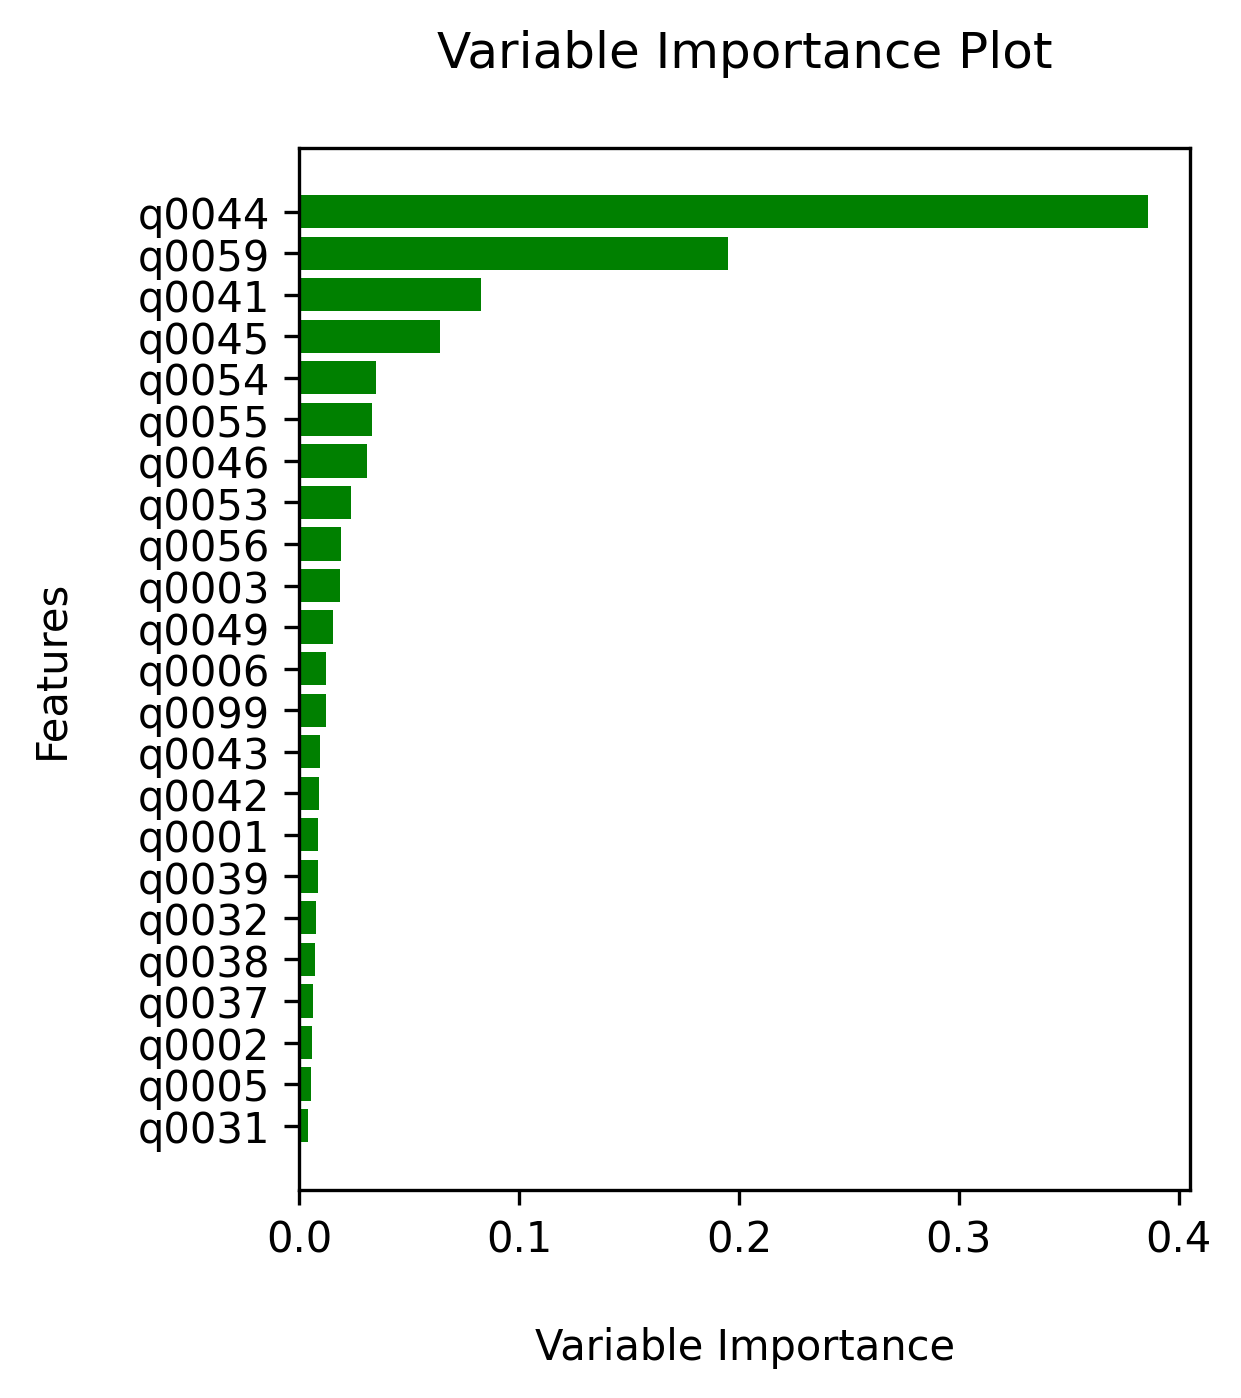

In [ ]:
plot_variable_importance(Forest, X_train)

# 8) XGBoost Regressor 

In [ ]:
from xgboost import XGBRegressor
modelxgb = XGBRegressor(random_state=1,silent=True, verbose = 0)

In [ ]:
parameters2 = {'max_depth': range(1,30), 'min_child_weight': range(1,30)}
XGBCV = GridSearchCV(XGBRegressor(random_state = 11),parameters2, cv =5, verbose = 0) 

In [ ]:
duplicate_columns = data.columns[data.columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


In [ ]:
XGBCV.fit(X_train, y_train)

In [ ]:
XGBCV.best_params_

{'max_depth': 2, 'min_child_weight': 2}

In [ ]:
print('best_params_: max_depth = 2, min_child_weight = 1') #I wrote that for safekeeping so as to avoid having to rerun the whole thing

best_params_: max_depth = 2, min_child_weight = 1


In [ ]:
modelxgb = XGBRegressor(max_depth = XGBCV.best_params_['max_depth'], min_samples_leaf = XGBCV.best_params_['min_child_weight'])
modelxgb.fit(X_train, y_train)

[16:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2, min_samples_leaf=2)

In [ ]:
y_pred_xgb = modelxgb.predict(X_test)
print('RMSE: ', mean_squared_error(y_test, y_pred_xgb, squared=False))
print('MAPE:', mean_absolute_percentage_error(y_test,y_pred_xgb))
print('R2: ', modelxgb.score(X_train, y_train))#the best out of all the regressors

RMSE:  0.7078450737060368
MAPE: 0.22434432699382037
R2:  0.9152976597953961


# 9) Visualization 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def Actual_Predicted_Plot(y_true, y_pred):
  min_value = np.array([y_true.min(), y_pred.min()]).min()
  max_value = np.array([y_true.max(), y_pred.max()]).max()
  fig, ax = plt.subplots(figsize = (10,5))
  ax.scatter(y_true, y_pred, color='green')
  ax.set_title("Actual vs Predicted Plot Forest Regressor")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

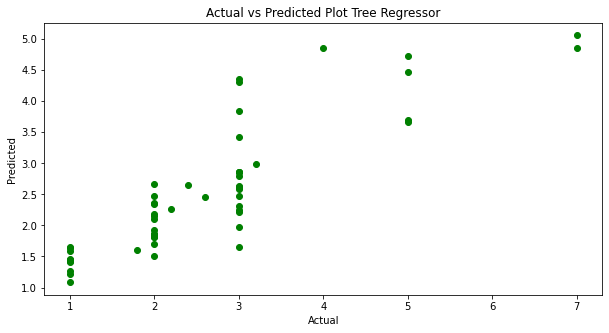

In [ ]:
Actual_Predicted_Plot(y_test, y_pred_for)

# 10) Preventive part


<p align ="justify"> Our previous analysis proved that Forest Regressions had the most potential in predicting accurate results. Nevertheless, its potential in a preventive part is outmatched by simple Linear Regressions. Indeed, by construction, the latter calculations are clearly understandable from a simple logical point of view. Thus, it is easier to integrate a system where the user can interact and see the consequences of their actions, when predictions are calculated linearly.</p>


<p align ="justify">Furthermore, when double-checking the results of the regressions, from a rational perspective the relationship of the variables with their alledged significance in the estimations of a burn out score, made more sense in Linear then in Forrest Regression. We used the linear regression from part 5.3).</p>

In [ ]:
y = data["q0051"]
X= data.drop(["burnout","q0051"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
X_train = sm.add_constant(X_train, prepend = False) 
model = sm.OLS(y_train, X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  q0051   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     22.21
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.45e-29
Time:                        15:41:14   Log-Likelihood:                -80.271
No. Observations:                 124   AIC:                             208.5
Df Residuals:                     100   BIC:                             276.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
q0001          0.0157      0.097      0.161      0.8

In [ ]:
model.params.abs().sort_values()

q0046    0.000044
q0056    0.007949
q0031    0.009167
q0049    0.010874
q0001    0.015667
q0099    0.027848
q0042    0.031507
q0043    0.032296
q0045    0.041307
q0002    0.049595
q0038    0.100550
q0037    0.110931
q0039    0.120115
q0055    0.140464
q0003    0.147288
q0053    0.150510
q0054    0.157750
q0041    0.206287
q0032    0.219312
q0044    0.242000
q0059    0.282252
q0005    0.327963
q0006    0.413485
const    0.871350
dtype: float64

##10.1) Inputing Variables (Front-end user Interface)

<p align ="justify"> We conducted our regressions with the variables which we deemed to be the most most siginificant when preparing our Dataset in parts 2-3. Now, in this part we need the users of our application to answer our shortened survey in order to calculate their burnout scores.</p>

<p align ="justify"> Once that is done, we group the data into 5 categories, namely: "Workload, Work Intensity, Social Disatanciation, Mental Exhaustion, and Social Distanciation". The first four categories comprise the 10 most significant variables in terms of correlation with expected value (note that we replaced Q5 with Q39, as we think it was formulated ambiguously in the original survey), the last category comprises all the remaining variables. We categorized them as such so that the users of our app can have a significant and precise impact on their employees</p>

In [ ]:
Q1  = int(input('You have too much work to do? \nScale: disagree 1-4 agree: '))
Q2  = int(input('\nYou have to work extra hard in order to reach a deadline? \nScale: disagree 1-4 agree: '))
Q3  = int(input('\nYou have to work at speed? \nScale: disagree 1-4 agree: '))
Q5  = int(input('\nYou have problems with the work pace? \nScale: disagree 1-4 agree: '))
Q6  = int(input('\nYou have problems with the workload? \nScale: disagree 1-4 agree: '))
Q31 = int(input('\nYou are irritable at home because your work is demanding? \nScale: disagree 1-4 agree: '))
Q32 = int(input('\nYou have difficulties fulfilling your obligations at home? \nScale: disagree 1-4 agree: '))
Q37 = int(input('\nYour working hours make it difficult to meet your obligations at home? \nScale: disagree 1-4 agree: '))
Q39 = int(input('\nYou have so much work to do that you do not have time for your hobbies? \nScale: disagree 1-4 agree: '))
Q41 = int(input('\nThe demands of your work make it difficult to feel relaxed at home? \nScale: disagree 1-4 agree: '))
Q38 = int(input('\nYou have no energy through your work to do nice things with your \npartner, family, and or friends? \nScale: disagree 1-4 agree: '))
Q42 = int(input('\nYour work takes the time that you would rather spend on your \npartner, family, and or friends? \nScale: disagree 1-4 agree: '))
Q43 = int(input('\nAfter a pleasant working day/workweek, you would like to do more \nactivities with your partner,family, and or friends? \nScale: disagree 1-4 agree: '))
Q44 = int(input('\nI feel mentally exhausted by my work. \nScale: disagree 1-7 agree: '))
Q45 = int(input('\nI feel empty at the end of a working day. \nScale: disagree 1-7 agree: '))
Q46 = int(input('\nI feel tired when I get up in the morning, and there is another \nworking day for me. \nScale: disagree 1-7 agree: '))
Q49 = int(input('\nWorking with people all day is a heavy burden for me. \nScale: disagree 1-7 agree: '))
Q53 = int(input('\nI feel that I have become more indifferent to other people since I have this job. \nScale: disagree 1-7 agree: '))
Q54 = int(input('\nI am concerned that my work dulls me emotionally. \nScale: disagree 1-7 agree: '))
Q55 = int(input('\nI feel frustrated by my job. \nScale: disagree 1-7 agree: '))
Q56 = int(input('\nI think I am too much committed to my work. \nScale: disagree 1-7 agree: '))
Q59 = int(input('\nI feel at the end of my Latin.\nScale: disagree 1-7 agree: '))
Q99 = int(input('\nHow many hours do you work per week on average? \nScale: 1 = <30, 2 = 30-40, 3 = 41-50, 4 = 51-60, 5 = >60: '))


intercept = model.params['const']
workload = (Q32 * model.params['q0032'] + Q6 * model.params['q0006'])
work_intensity = (Q3 * model.params['q0003'] + Q41 * model.params['q0041'])
social_distan = (Q54 * model.params['q0054'] + Q53 * model.params['q0053'])
mental_exhaust = (Q44 * model.params['q0044'] + Q59 * model.params['q0059'] + Q55 * model.params['q0055'])
untweakable_var = (Q39 * model.params['q0039'] + Q37 * model.params['q0037'] + Q38 * model.params['q0038'] 
                    + Q2 * model.params['q0002'] + Q45 * model.params['q0045'] + Q43 * model.params['q0043'] 
                    + Q42 * model.params['q0042']+ Q99 * model.params['q0099']+ Q1 * model.params['q0001']
                    + Q49 * model.params['q0049'] + Q31 * model.params['q0031'] + Q56 * model.params['q0056']
                    + Q46 * model.params['q0046'] + Q5 * model.params['q0005'])


You have too much work to do? 
Scale: disagree 1-4 agree: 1

You have to work extra hard in order to reach a deadline? 
Scale: disagree 1-4 agree: 3

You have to work at speed? 
Scale: disagree 1-4 agree: 1

You have problems with the work pace? 
Scale: disagree 1-4 agree: 2

You have problems with the workload? 
Scale: disagree 1-4 agree: 2

You are irritable at home because your work is demanding? 
Scale: disagree 1-4 agree: 2

You have difficulties fulfilling your obligations at home? 
Scale: disagree 1-4 agree: 2

Your working hours make it difficult to meet your obligations at home? 
Scale: disagree 1-4 agree: 2

You have so much work to do that you do not have time for your hobbies? 
Scale: disagree 1-4 agree: 2

The demands of your work make it difficult to feel relaxed at home? 
Scale: disagree 1-4 agree: 2

You have no energy through your work to do nice things with your 
partner, family, and or friends? 
Scale: disagree 1-4 agree: 2

Your work takes the time that you would ra

In [ ]:
def diagnosis():
  diagnosis = intercept + workload + work_intensity + social_distan + mental_exhaust + untweakable_var #add this concept in the following equations

#We set the threshold of 45% by considering the seven ordinal options that the employee can answer to the question 51. 
#45% represents the 3rd answer of the ordinal scale i.e. any answer below "regularly" is considered as the threshold of "healthy" burnout

  if diagnosis/7 >= 0.45: 
    verdict = print('Your employee is over the critical threshold of burn out') 
  else:
    verdict = print('your employee is under the critical threshold of burn out')
  burnr = print('Burnout score of:', (diagnosis/7 * 100).round(2), '%')



In [ ]:
diagnosis()

Your employee is over the critical threshold of burn out
Burnout score of: 49.81 %


## 10.2) Optimization (back-end calculations)

In [ ]:
import numpy as np
from scipy.optimize import minimize
from sympy import symbols, refine, Eq

In [ ]:
def objective_fun(t):
 t1 = t[0]
 t2 = t[1]
 t3 = t[2]
 t4 = t[3]

 return t1 * workload + t2 * work_intensity + t3 * social_distan + t4 * mental_exhaust 

In [ ]:
def inequality_constraint(t):
 t1 = t[0]
 t2 = t[1]
 t3 = t[2]
 t4 = t[3]

 r = intercept + untweakable_var 

 eq = t1 * workload + t2 * work_intensity + t3 * social_distan + t4 * mental_exhaust
 return eq - (abs(r)+1)
#the "r" on the right signifies that the function has to be greater than the minimum value of indpendent part 
#of the function + 1 (the lowest score of q0051), namley because our evaluation (burnout or not) is on a scale of 0 to 1

In [ ]:
def inequality_constraint3(t):
 t1 = t[0]
 t2 = t[1]
 t3 = t[2]
 t4 = t[3]

 r = intercept + untweakable_var 

 eq = t1 * workload + t2 * work_intensity + t3 * social_distan + t4 * mental_exhaust
 return eq - (abs(r)+3)
 #Intially: the "r" on the right signifies that the function has to be greater than the minimum value of indpendent part 
 #of the function + 5 (the highest score we define that is till under the threshold of
 #burning out: 75%, scale of q0051 is 1-7, 0,75 * 7 = 5~), 
 #Tehn, I lowered it to three "3" which corresponds to occasionally,makes more sense from a qualitative poitnt of view

In [ ]:
bounds_t1 = (0.1,1.9) 
bounds_t2 = (0.1,1.9)
bounds_t3 = (0.1,1.9)
bounds_t4 = (0.1,1.9)

#these bounds represent the max percentage increase or decrease of the bounds, mathematically , it is set now to: min 90% decrease max 90% increase, so max decrease: 100% max increase 100%

bounds = [bounds_t1,bounds_t2,bounds_t3,bounds_t4]

constraint1 = {'type': 'ineq', 'fun': inequality_constraint}

constraint = [constraint1]

x0 = [1,1,1,1] #starting point of variable search

result = minimize(objective_fun, x0, method = 'SLSQP', bounds = bounds, constraints = constraint)


constraint3 = {'type': 'ineq', 'fun': inequality_constraint3}

constraint3 = [constraint3]

result3 = minimize(objective_fun, x0, method = 'SLSQP', bounds = bounds, constraints = constraint3)
  

In [ ]:
print(result) #seems to work more or less

     fun: 2.3533520037940914
     jac: array([0.38834545, 0.55986235, 1.23303935, 2.6588639 ])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.89333994, 0.8462324 , 0.66134265, 0.26973639])


In [ ]:
print(result3)

     fun: 4.35335197659041
     jac: array([0.38834548, 0.55986238, 1.23303938, 2.6588639 ])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.97912232, 0.96990148, 0.9337111 , 0.85705796])


In [ ]:
t1 = result.x[0]
t2 = result.x[1]
t3 = result.x[2]
t4 = result.x[3]

t13 = result3.x[0]
t23 = result3.x[1]
t33 = result3.x[2]
t43 = result3.x[3]

In [ ]:
optimized_diagnosis = intercept + untweakable_var + t1 * workload + t2 * work_intensity + t3 * social_distan + t4 * mental_exhaust
print((optimized_diagnosis/7 * 100).round(3), '%')

14.286 %


In [ ]:
threshold_diagnosis = intercept + untweakable_var + t13 * workload + t23 * work_intensity + t33 * social_distan + t43 * mental_exhaust
print((threshold_diagnosis/7 * 100).round(3), '%')

42.857 %


## 10.3) Recommendation (Front-end user Interface)



In [ ]:
def optimal_recommendation():
  b = 1
  for a in [t1,t2,t3,t4]:
    if a <= b:
      b = 0
      print('Optimally:')

  if t1 < 1:
    print('you should decrease the workload by', (abs(1-t1) * 100).round(1),'%')
  if t2 < 1:
    print('you should decrease the work intensity by', (abs(1-t2) * 100).round(1),'%')
  if t3 < 1:
    print('you should decrease social_distan by', (abs(1-t3) * 100).round(1),'%') 
  if t4 < 1:
    print('you should decrease mental_exhaust by', (abs(1-t4) * 100).round(1),'%')

In [ ]:
optimal_recommendation()

Optimally:
you should decrease the workload by 10.7 %
you should decrease the work intensity by 15.4 %
you should decrease social_distan by 33.9 %
you should decrease mental_exhaust by 73.0 %


In [ ]:
def threshold_recommendation():
  b = 1
  for a in [t13,t23,t33,t43]:
    if a <= b:
      b = 0
      print('Critically:')

  if t13 < 1:
    print('you should decrease the workload by', (abs(1-t13) * 100).round(1),'%')
  else:
    print("the workload's margin to critical threshold is", (abs(1-t13) * 100).round(1),'%')

  if t23 < 1:
    print('you should decrease the work intensity by', (abs(1-t23) * 100).round(1),'%')
  else:
    print("the work intensity's margin to critical threshold is", (abs(1-t23) * 100).round(1),'%')

  if t33 < 1:
    print('you should decrease social_distan by', (abs(1-t33) * 100).round(1),'%') 
  else:
    print("the social state's margin to critical threshold is", (abs(1-t33) * 100).round(1),'%')

  if t43 < 1:
    print('you should decrease mental_exhaust by', (abs(1-t43) * 100).round(1),'%')
  else:
    print("the mental exhaust's margin to critical threshold is", (abs(1-t43) * 100).round(1),'%')

In [ ]:
threshold_recommendation()

Critically:
you should decrease the workload by 2.1 %
you should decrease the work intensity by 3.0 %
you should decrease social_distan by 6.6 %
you should decrease mental_exhaust by 14.3 %


In [ ]:
def rediagnosis():
  if t1 < 1:
    tone = 1 + float(input("How much do you want to change the workload variable? \n(Please write % in numerical format and don't forget the negative sign): "))
  if t2 < 1:
    ttwo = 1 + float(input("\nHow much do you want to change the work intensity variable? \n(Please write % in numerical format and don't forget the negative sign): "))
  if t3 < 1:
    tthree = 1 + float(input("\nHow much do you want to change the social distanciation variable? \n(Please write % in numerical format and don't forget the negative sign): ")) 
  if t4 < 1:
    tfour = 1 + float(input("\nHow much do you want to change the mental exhaustion variable? \n(Please write % in numerical format and don't forget the negative sign): "))
     
  
  newd = intercept + tone * workload + ttwo * work_intensity + tthree * social_distan + tfour * mental_exhaust + untweakable_var
  print('')

  if newd/7 >= 0.45: #or any other value we decide
    verdict = print('your employee is over the critical threshold of burn out') 
  else:
    verdict = print('your employee is under the critical threhold of burn out')
  print('burn out rate of', (newd/7 * 100).round(2), '%')

In [ ]:
rediagnosis()

How much do you want to change the workload variable? 
(Please write % in numerical format and don't forget the negative sign): -0.4

How much do you want to change the work intensity variable? 
(Please write % in numerical format and don't forget the negative sign): -0.4

How much do you want to change the social distanciation variable? 
(Please write % in numerical format and don't forget the negative sign): -0.4

How much do you want to change the mental exhaustion variable? 
(Please write % in numerical format and don't forget the negative sign): -0.4

your employee is under the critical threhold of burn out
burn out rate of 22.15 %
